# **Text analysis in Python**

## Word cloud and emotion analysis

In [1]:
# initialisation
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from urllib.request import urlopen
!pip install nrclex
# need to run the following line to fix the "MissingCorpusError":
!python -m textblob.download_corpora
from nrclex import NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 7.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=5c32ef312e2540bda117fc6ca570241205b2fcc79108e1dfb5f1b36f6ca564c0
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_d

In [2]:
# read from UHS press release
url = "https://www.uhs.nhs.uk/whats-new/press-releases/cancer-survivors-hope-for-life-saving-research-on-international-clinical-trials-day"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")
soupText = soup.get_text()


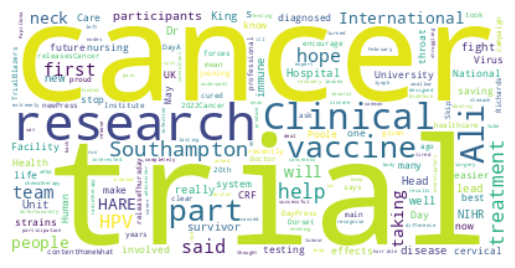

In [3]:
# word cloud
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(soupText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

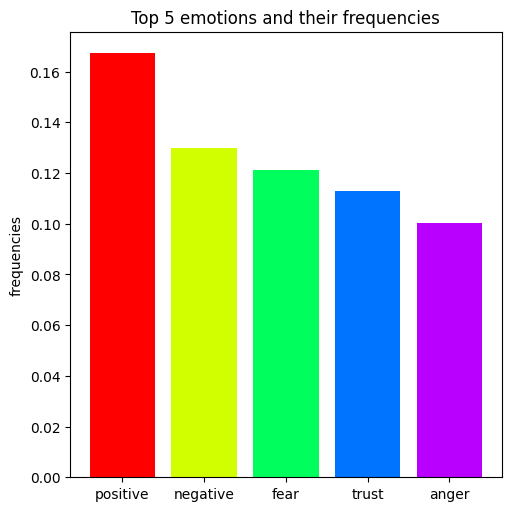

In [4]:
# emotion analysis
text_object = NRCLex(soupText)
affect_freq = (text_object.affect_frequencies)
affect_freq_sorted = {k: v for k, v in sorted(affect_freq.items(), key=lambda item: item[1], reverse=True)}
affect_freq_top5 = dict(list(affect_freq_sorted.items())[0:5])

fig, ax = plt.subplots(figsize=(5,5), layout="constrained")
my_cmap = plt.get_cmap("hsv")
colors = [my_cmap(x/5) for x in range(5)]
ax.bar(list(affect_freq_top5.keys()),list(affect_freq_top5.values()),color=colors)
ax.set_ylabel("frequencies")
ax.set_title("Top 5 emotions and their frequencies")
plt.show()